In [155]:
import valenspy as vp
from valenspy._utilities import load_yml
from valenspy.processing.select import select_point
from valenspy.diagnostic.functions import mean_bias, mean_absolute_error, root_mean_square_error, spearman_correlation, perkins_skill_score, time_series_spatial_mean
from valenspy.diagnostic.visualizations import *
from valenspy.processing.regrid import *
from pathlib import Path

import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import percentileofscore
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
import math

# define machine name - used for paths of (observational) datasets
machine = 'hortense'

manager = vp.InputManager(machine=machine)

## Predefining vars

In [156]:
wrf_variable = "LU_INDEX"

In [157]:
file_domain1 = "/dodrio/scratch/users/vsc35191/WP3/geo_em.d01.nc"
file_domain2 = "/dodrio/scratch/users/vsc35191/WP3/geo_em.d02.nc"
file_domain3 = "/dodrio/scratch/users/vsc35191/WP3/geo_em.d03_new.nc"

In [158]:
file_domains = [file_domain1, file_domain2, file_domain3]

## Visualizing grid WRF

/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/fiens/conda_envs/valenspy_dev/lib/python3.9/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


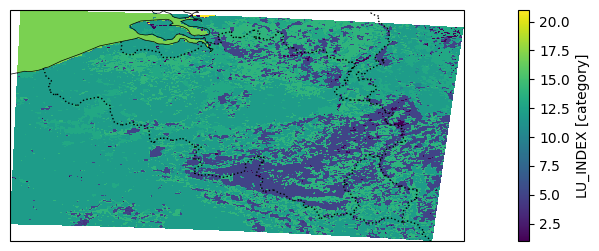

In [159]:
fig, ax = plt.subplots(
    1, 1, figsize=(14, 3), subplot_kw={"projection": ccrs.PlateCarree()}
)


ds = xr.open_mfdataset(file_domains[2], combine='by_coords')
ds = ds.assign_coords({"lat":ds.CLAT})
ds = ds.assign_coords({"lon":ds.CLONG})
da = ds[wrf_variable]

da.plot(x = "lon", y = "lat")
ax.add_feature(cfeature.BORDERS, linestyle=":")
ax.add_feature(cfeature.COASTLINE, linewidth=0.5, color="k")


/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/fiens/conda_envs/valenspy_dev/lib/python3.9/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


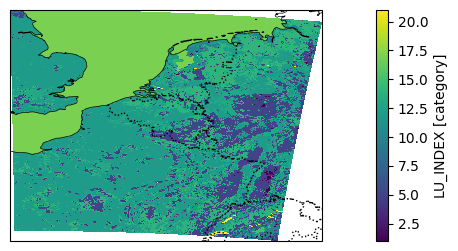

In [160]:
fig, ax = plt.subplots(
    1, 1, figsize=(14, 3), subplot_kw={"projection": ccrs.PlateCarree()}
)


ds = xr.open_mfdataset(file_domains[1], combine='by_coords')
ds = ds.assign_coords({"lat":ds.CLAT})
ds = ds.assign_coords({"lon":ds.CLONG})
da = ds[wrf_variable]

da.plot(x = "lon", y = "lat")
ax.add_feature(cfeature.BORDERS, linestyle=":")
ax.add_feature(cfeature.COASTLINE, linewidth=0.5, color="k")


/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/fiens/conda_envs/valenspy_dev/lib/python3.9/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


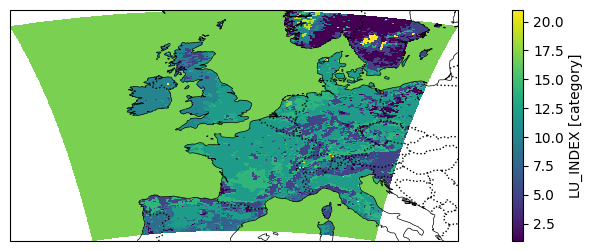

In [161]:
fig, ax = plt.subplots(
    1, 1, figsize=(14, 3), subplot_kw={"projection": ccrs.PlateCarree()}
)


ds = xr.open_mfdataset(file_domains[0], combine='by_coords')
ds = ds.assign_coords({"lat":ds.CLAT})
ds = ds.assign_coords({"lon":ds.CLONG})
da = ds[wrf_variable]

da.plot(x = "lon", y = "lat")
ax.add_feature(cfeature.BORDERS, linestyle=":")
ax.add_feature(cfeature.COASTLINE, linewidth=0.5, color="k")
